# 1.1 INDICE - CONTENIDO

In [153]:
print('1. Introduction')
print('2. Importacion de librerias')
print('3. Lectura de datos')
print('4. Anilisis por columna')
print('5. Busqueda y analisis de datos nulos')
print('5. Reemplazamiento de datos nulos y atipicos')
print('6. Creacion de nuevas columnas')
print('7. Visualizacion de datos')
print('8. Analisis mediante pivot_table')
print('9. Creacion de nuevo dataset(probability)')
print('10. Conclusiones')

1. Introduction
2. Importacion de librerias
3. Lectura de datos
4. Anilisis por columna
5. Busqueda y analisis de datos nulos
5. Reemplazamiento de datos nulos y atipicos
6. Creacion de nuevas columnas
7. Visualizacion de datos
8. Analisis mediante pivot_table
9. Creacion de nuevo dataset(probability)
10. Conclusiones


# 1.2 CONTEXTO - PROYECTO

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos
para ajustar el presupuesto de publicidad.
Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la
cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


# 1.3 CARGA DE LIBRERIAS

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as np
import scipy as np

# 1.4 CARGA DE DATOS

In [155]:
calls_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_calls.csv')
internet_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_internet.csv')
messages_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_messages.csv')
plans_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_plans.csv')
users_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_users.csv')

In [156]:
calls_data

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [157]:
internet_data

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [158]:
messages_data

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [159]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [160]:
users_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


# 2.0 ANALISIS DE DATOS & NULOS

## 2.1 MESSAGES

In [161]:
messages_data.info()
# podemos observar que la composicion del dataset donde vemos el tipo de dato que contine cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [162]:
messages_data.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [163]:
messages_data.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

## 2.2 USERS DATA

In [164]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [165]:
users_data.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

## 2.3 CALLS DATA

In [166]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [167]:
calls_data.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

## 2.4 INTERNET DATA

In [168]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [169]:
internet_data.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

## 2.5 PLANS DATA

In [170]:
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [171]:
plans_data.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Vemos que hay varios datos nulos en el dataset users_data pero observamos que basicamente son todos aquellos que no tienen aun fecha de baja de la tarifa. Por lo que realmente esos datos nulos igualmente si nos aportan informacion. Por lo que vamos a cambiarlos por datos numericos para que nos puedan servir en el analisis futuro.

#  3. PREPRACION DE DATASETS

## 3.1. MESSAGES

In [172]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

In [173]:
messages_data['month'] = messages_data['message_date'].dt.month

In [174]:
messages_data['day_of_week'] = pd.to_datetime(messages_data['message_date']).dt.day_name()

In [175]:
pd.pivot_table(messages_data, index = ['user_id', 'month'], values = ['id'], aggfunc = 'count')

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36
...            ..
1496    9      21
        10     18
        11     13
        12     11
1497    12     50

[1806 rows x 1 columns]

In [176]:
messages_data

,id,user_id,message_date,month,day_of_week
0,1000_125,1000,2018-12-27,12,Thursday
1,1000_160,1000,2018-12-31,12,Monday
2,1000_223,1000,2018-12-31,12,Monday
3,1000_251,1000,2018-12-27,12,Thursday
4,1000_255,1000,2018-12-26,12,Wednesday
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,Monday
76047,1497_536,1497,2018-12-24,12,Monday
76048,1497_547,1497,2018-12-31,12,Monday
76049,1497_558,1497,2018-12-24,12,Monday


## 3.2. CALLS

In [177]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')

In [178]:
calls_data['month'] = calls_data['call_date'].dt.month

In [179]:
calls_data['duration'] = calls_data['duration'].apply(np.ceil)

In [180]:
calls_data['day_of_week'] = pd.to_datetime(calls_data['call_date']).dt.day_name()

In [181]:
pd.pivot_table(calls_data, index = ['user_id', 'month'], values = ['duration'], aggfunc = 'sum')

duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0
...                 ...
1498    12        339.0
1499    9         346.0
        10        385.0
        11        308.0
        12        496.0

[2258 rows x 1 columns]

In [182]:
calls_data

,id,user_id,call_date,duration,month,day_of_week
0,1000_93,1000,2018-12-27,9.0,12,Thursday
1,1000_145,1000,2018-12-27,14.0,12,Thursday
2,1000_247,1000,2018-12-27,15.0,12,Thursday
3,1000_309,1000,2018-12-28,6.0,12,Friday
4,1000_380,1000,2018-12-30,5.0,12,Sunday
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11,Wednesday
137731,1499_200,1499,2018-10-20,11.0,10,Saturday
137732,1499_201,1499,2018-09-21,9.0,9,Friday
137733,1499_202,1499,2018-10-10,1.0,10,Wednesday


## 3.3 INTERNET

In [183]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
internet_data['month'] = internet_data['session_date'].dt.month

In [184]:
internet_data['gb_used'] = internet_data['mb_used'] / 1024 # esto es para pasar de mb a gb

In [185]:
internet_data['gb_used'] = internet_data['gb_used'].apply(np.ceil)

In [186]:
internet_data['day_of_week'] = pd.to_datetime(internet_data['session_date']).dt.day_name()

In [187]:
pd.pivot_table(internet_data, index = ['user_id', 'month'], values = ['gb_used'], aggfunc = 'count')

gb_used
user_id month         
1000    12           5
1001    8           25
        9           53
        10          56
        11          51
...                ...
1498    12          65
1499    9           45
        10          61
        11          49
        12          65

[2277 rows x 1 columns]

In [188]:
internet_data

,id,user_id,session_date,mb_used,month,gb_used,day_of_week
0,1000_13,1000,2018-12-29,89.86,12,1.0,Saturday
1,1000_204,1000,2018-12-31,0.00,12,0.0,Monday
2,1000_379,1000,2018-12-28,660.40,12,1.0,Friday
3,1000_413,1000,2018-12-26,270.99,12,1.0,Wednesday
4,1000_442,1000,2018-12-27,880.22,12,1.0,Thursday
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,1.0,Saturday
104821,1499_216,1499,2018-12-30,304.72,12,1.0,Sunday
104822,1499_217,1499,2018-09-22,292.75,9,1.0,Saturday
104823,1499_218,1499,2018-12-07,0.00,12,0.0,Friday


## 3.3 MERGE DE TABLAS

## 3.3.1 TABLA DE CONSUMO

In [189]:
consume_table = pd.merge(pd.merge(pd.pivot_table(calls_data, index = ['user_id', 'month'], values = ['duration'], aggfunc = 'sum'), pd.pivot_table(messages_data, index = ['user_id', 'month'], values = ['id'], aggfunc = 'count'), on = ['user_id', 'month'], how = 'outer'), pd.pivot_table(internet_data, index = ['user_id', 'month'], values = ['gb_used'], aggfunc = 'sum'), on = ['user_id', 'month'], how = 'outer').reset_index()

In [190]:
consume_table

,user_id,month,duration,id,gb_used
0,1000,12,124.0,11.0,4.0
1,1001,8,182.0,30.0,21.0
2,1001,9,315.0,44.0,41.0
3,1001,10,393.0,53.0,50.0
4,1001,11,426.0,36.0,49.0
...,...,...,...,...,...
2288,1349,12,NaN,61.0,27.0
2289,1361,5,NaN,2.0,7.0
2290,1482,10,NaN,2.0,NaN
2291,1108,12,NaN,NaN,2.0


## 3.2.2 TABLA DE USUARIO & PLAN

In [191]:
users_plans = pd.merge(users_data, plans_data, left_on = 'plan', right_on = 'plan_name', how = 'left').drop('plan_name', axis = 1)

In [192]:
users_plans

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,50,15360,500,20,10,0.03,0.03
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,50,15360,500,20,10,0.03,0.03
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,50,15360,500,20,10,0.03,0.03
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,50,15360,500,20,10,0.03,0.03
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,500,20,10,0.03,0.03


## 3.2.3 TABLA DE CONSUMO DEL USUARIO

In [193]:
users_plans_consume = pd.merge(users_plans, consume_table, on = 'user_id', how = 'left')

In [194]:
users_plans_consume

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,duration,id,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,12.0,124.0,11.0,4.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,8.0,182.0,30.0,21.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,9.0,315.0,44.0,41.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,10.0,393.0,53.0,50.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,11.0,426.0,36.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,500,20,10,0.03,0.03,12.0,339.0,NaN,56.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,9.0,346.0,NaN,37.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,10.0,385.0,NaN,52.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,11.0,308.0,NaN,43.0


# 4.0 EDA - 1os ANALISIS DE DATOS SIMPLES

## 4.1 CATEGORICOS

In [195]:
users_plans_consume['plan'].value_counts()

surf        1579
ultimate     724
Name: plan, dtype: int64

<AxesSubplot:ylabel='plan'>

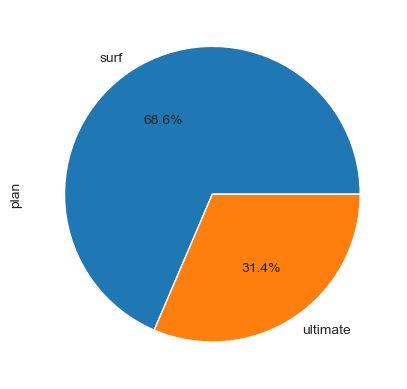

In [196]:
users_plans_consume['plan'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

Primeros insghts:
- El 68,6 de los usuarios eligen plan surf.
- El restante '31,4% eligen el plan ultimate

In [197]:
users_plans_consume['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          378
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 89
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Raleigh-Cary, NC MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

<AxesSubplot:>

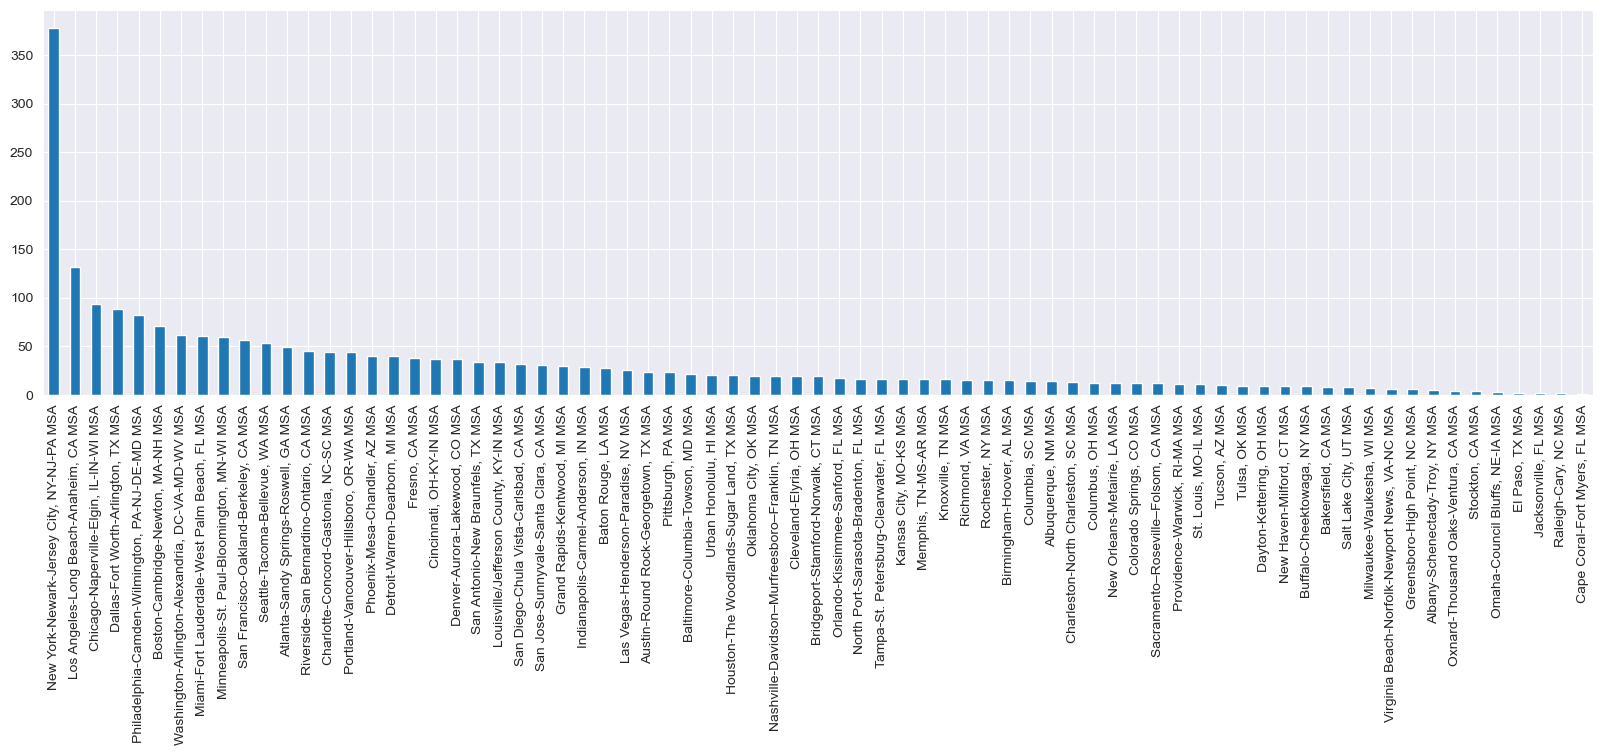

In [198]:
users_plans_consume['city'].value_counts().plot(kind = 'bar', figsize = (20, 5))

Observamos:
- La ciudad donde mas clientes tiene nuestra empresa es New York con una clara diferencia del resto.

In [199]:
users_plans_consume.groupby('plan')['city'].value_counts()

plan      city                                     
surf      New York-Newark-Jersey City, NY-NJ-PA MSA    312
          Los Angeles-Long Beach-Anaheim, CA MSA        81
          Dallas-Fort Worth-Arlington, TX MSA           75
          Boston-Cambridge-Newton, MA-NH MSA            66
          Chicago-Naperville-Elgin, IL-IN-WI MSA        52
                                                      ... 
ultimate  New Haven-Milford, CT MSA                      3
          Orlando-Kissimmee-Sanford, FL MSA              3
          Austin-Round Rock-Georgetown, TX MSA           1
          Bakersfield, CA MSA                            1
          Cape Coral-Fort Myers, FL MSA                  1
Name: city, Length: 122, dtype: int64

<AxesSubplot:>

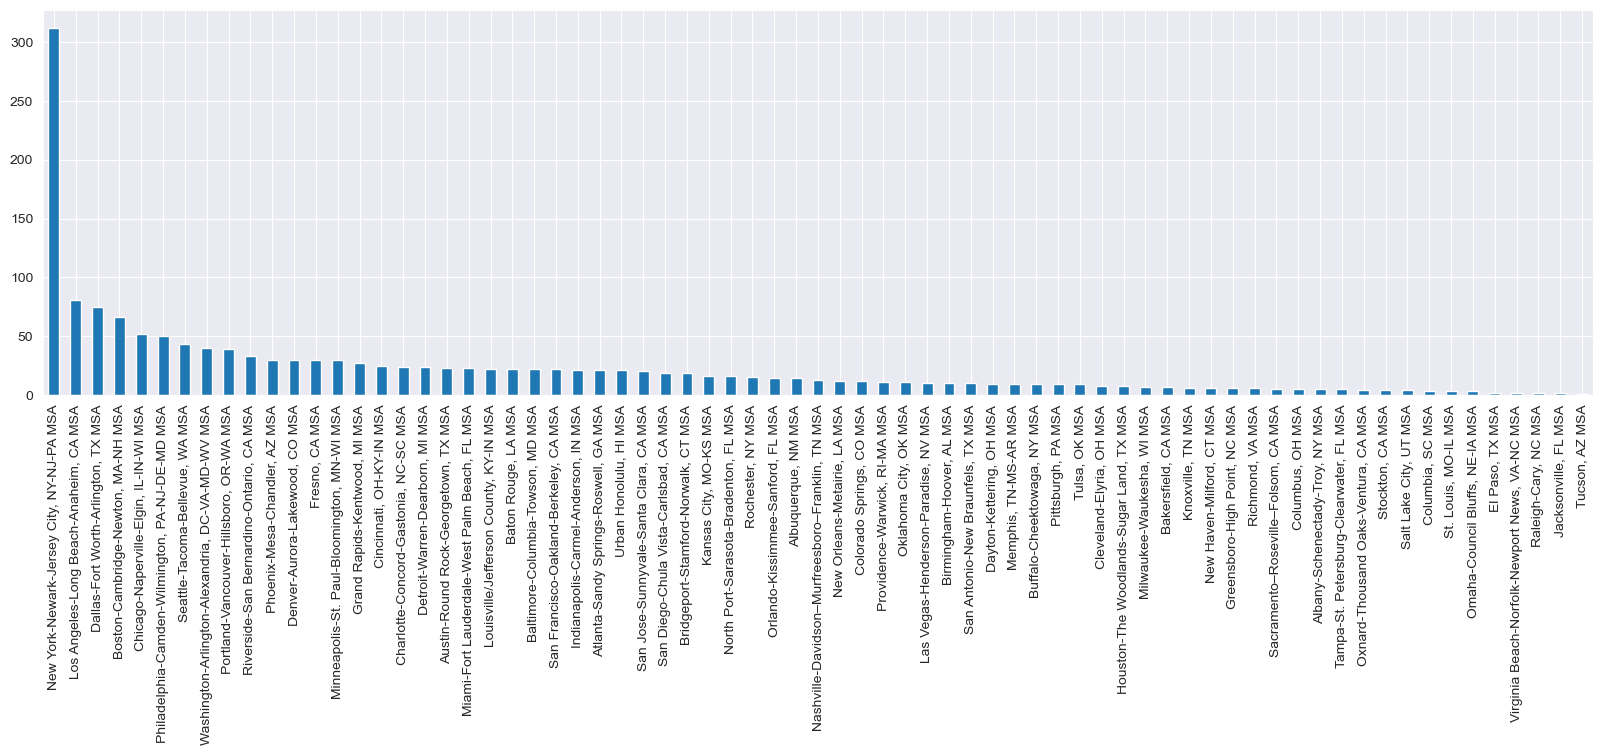

In [200]:
users_plans_consume[users_plans_consume['plan'] == 'surf']['city'].value_counts().plot(kind = 'bar', figsize = (20, 5))

observamos:
- La ciudad de New York es la que recoge mayor cantidad del plan surf.

<AxesSubplot:>

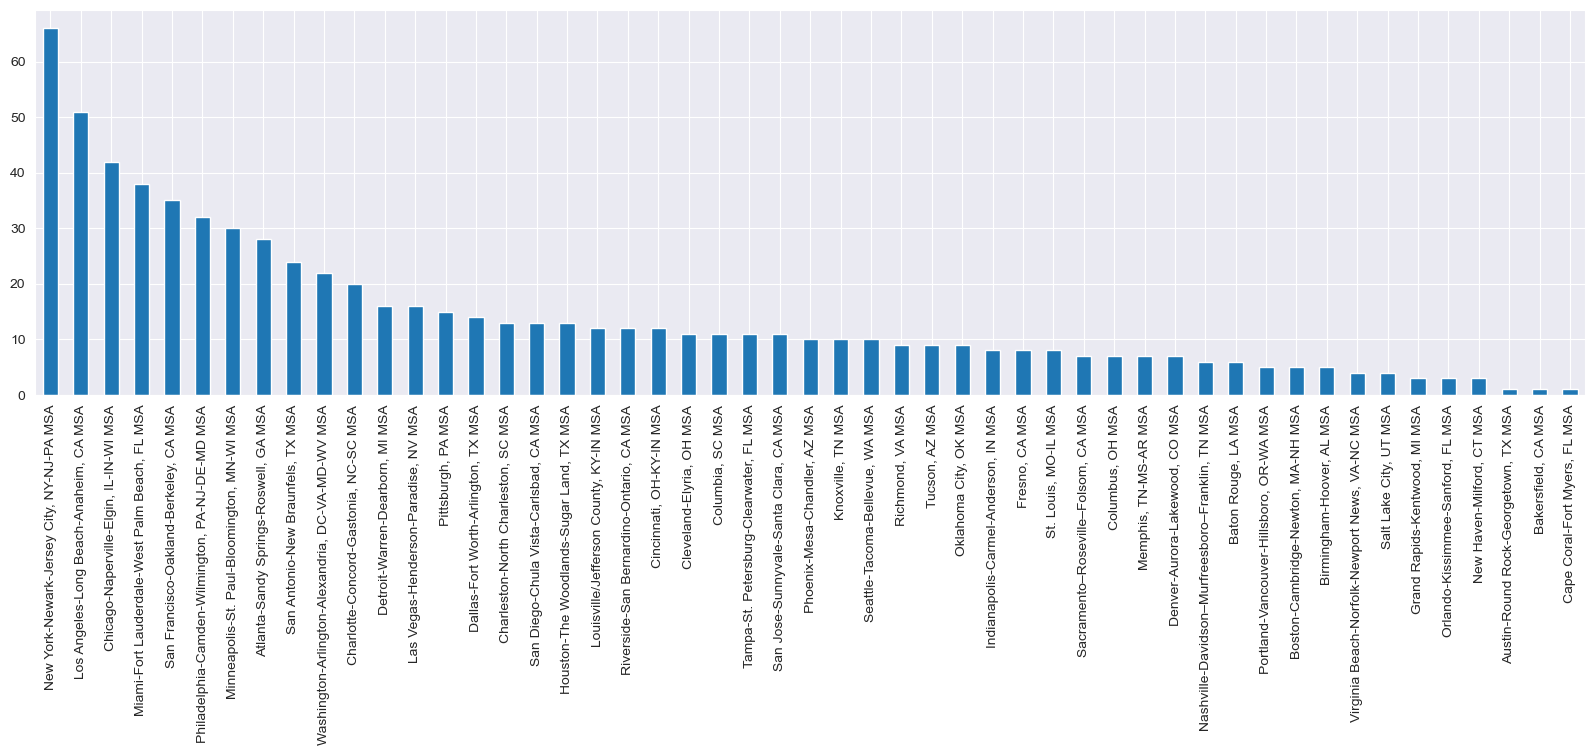

In [201]:
users_plans_consume[users_plans_consume['plan'] == 'ultimate']['city'].value_counts().plot(kind = 'bar', figsize = (20, 5))

Observamos:
- Pese a que New York es la que recoge de nuevo mas usuarios la distribución por ciudad del plan ultimate es mayor ya que recoge mas ciudades con una cantidad de usuarios notable.
- Las ciudades con mayor cantidad de usuarios estan en New York, Los Angeles, Chicago, Miami, etc...
- Esto nos puede indicar que pese a que New York es la que recoge mas usuarios puede ser que la distribución economica de la ciudad no sea tan grande ya que las tarifas mas baratas estan en esa ciudad mientras que en el resto de ciudades si tienen la economica suficiente para obtener la tarifa ultimate.

Estas conclusiones se deberian enviar al equipo de ventas y marketing de manera que a la hora de invertir en promos estos datos sean kPIs de entrada en sus filtros.

## 4.2 CUANTITATIVOS

In [202]:
users_plans_consume['age'].value_counts()

18    83
27    79
61    76
65    67
64    67
33    61
34    60
47    57
49    56
28    53
30    52
39    52
52    51
56    51
46    50
69    49
51    49
23    48
70    48
20    47
42    46
29    44
66    44
40    43
19    41
41    41
45    41
60    38
57    37
75    36
67    34
26    34
25    34
71    34
59    33
53    33
48    32
21    32
44    32
36    32
50    32
31    31
54    30
55    30
22    28
63    27
73    26
74    25
38    24
37    23
24    23
35    22
58    20
72    20
62    13
68    12
32    11
43     9
Name: age, dtype: int64

<AxesSubplot:ylabel='Frequency'>

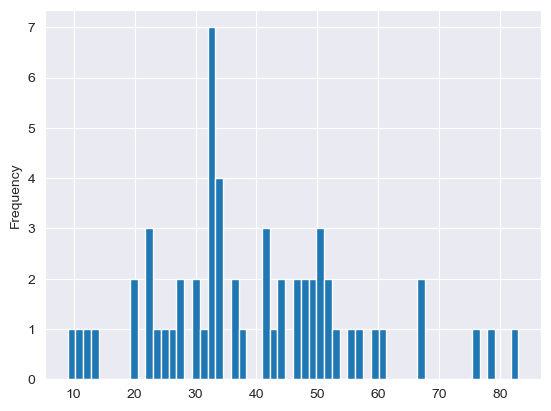

In [203]:
users_plans_consume['age'].value_counts().plot(kind = 'hist', bins = 58)

observamos:
- Los mayores picos de edad del usurario estan entre los 20 y 30, siendo la edad entre los 30 y 40 donde hay mas usuarios, se mantiene estbale hasta los 50 y apartir de los 60 los clientes son mucho mas escasos.
- Tenemos detalles como que hay usuarios de 9, 11, 12 y 13 años. Lo que indica que son menores. Puede ser que tengan autorizacion paterna o que el dato sea erroneo.

In [204]:
users_plans_consume[users_plans_consume['plan'] == 'surf']['age'].value_counts()

18    62
33    56
61    56
65    47
30    47
27    46
28    44
49    42
40    41
29    40
45    39
20    38
47    38
56    37
39    36
26    34
52    33
42    33
64    33
34    32
70    32
51    32
25    31
66    30
54    30
19    29
55    29
44    28
21    28
67    27
71    27
63    27
46    26
37    23
60    22
22    22
75    21
53    21
50    21
72    20
23    20
59    19
36    18
48    18
35    16
24    15
69    15
57    14
31    14
62    13
74    11
41    10
73    10
43     9
38     7
68     5
58     3
32     2
Name: age, dtype: int64

<AxesSubplot:ylabel='Frequency'>

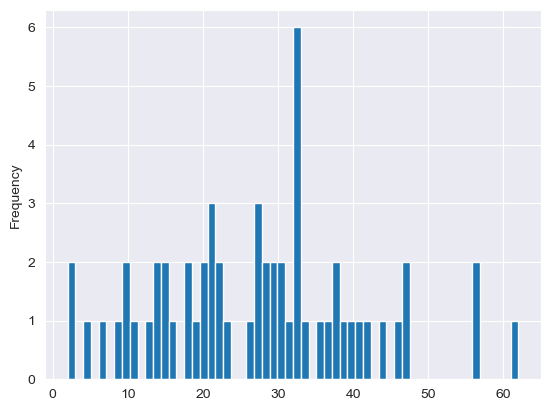

In [205]:
users_plans_consume[users_plans_consume['plan'] == 'surf']['age'].value_counts().plot(kind = 'hist', bins = 58)

Al igual que en la tabla anterior podemos observar que la mayoria del publico se encuentra entre las edades de 20 y 35 años pero observamos un reparto mayor entre las edades inferiores a 20 cosa que en el anterior grafico no osbservabamos.

In [206]:
users_plans_consume[users_plans_consume['plan'] == 'ultimate']['age'].value_counts()

69    34
64    34
27    33
41    31
23    28
34    28
46    24
57    23
18    21
65    20
61    20
47    19
52    18
51    17
38    17
31    17
58    17
39    16
70    16
60    16
73    16
75    15
59    14
56    14
74    14
66    14
48    14
36    14
49    14
42    13
19    12
53    12
50    11
28     9
20     9
32     9
24     8
68     7
67     7
71     7
22     6
35     6
30     5
33     5
21     4
44     4
29     4
25     3
45     2
40     2
55     1
Name: age, dtype: int64

<AxesSubplot:ylabel='Frequency'>

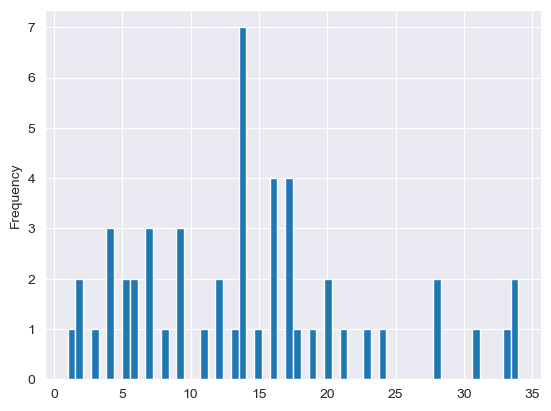

In [207]:
users_plans_consume[users_plans_consume['plan'] == 'ultimate']['age'].value_counts().plot(kind = 'hist', bins = 58)

Observamos:
- Este datos si que no nos lo esperabamos. La mayoria de usuarios tienen una edad comprendida entre 4 a 20 años
- La edad de 13-14 años el mayor pico de venta de dicha tarifa.

In [208]:
users_plans_consume['churn_date'] = users_plans_consume['churn_date'].str[5:7]

In [209]:
users_plans_consume['churn_date'].value_counts()

11    48
12    38
09    30
10    30
07     8
08     6
Name: churn_date, dtype: int64

<AxesSubplot:>

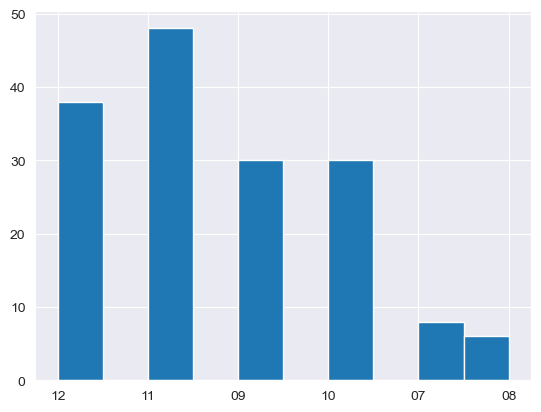

In [210]:
users_plans_consume['churn_date'].hist()

Claramente podemos observar que los meses del año con mas bajas son los meses de el total de usuarios son los meses de Noviembre, Diciembre, Septiembre y Octubre.

<AxesSubplot:xlabel='churn_date', ylabel='count'>

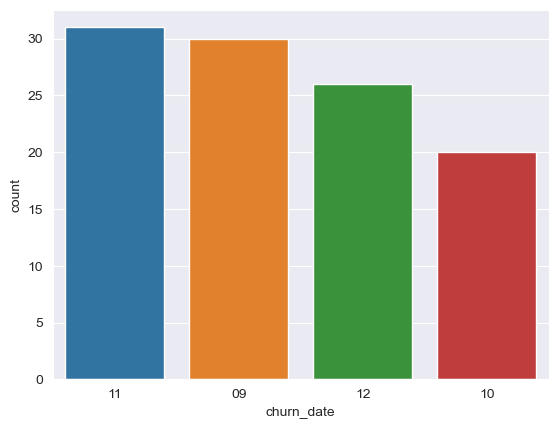

In [211]:
sns.countplot(x = 'churn_date', data = users_plans_consume[users_plans_consume['plan'] == 'surf'])

En este grafico apreciamos las bajas de los usuarios del plan surf donde podemos observar:
- Que la mayoria de bajs ocurren en los ultimos 4 meses del año. Esto puede ser que arroje la siguiente información:
- Los usuarios descontentos al haber probado el plan durante el año deciden cambiar de empresa.
- La competencia durante los ultimos meses del año sacan nuevas ofertas y es por eso que ocurre la migracion de los usuarios.
-

<AxesSubplot:xlabel='churn_date', ylabel='count'>

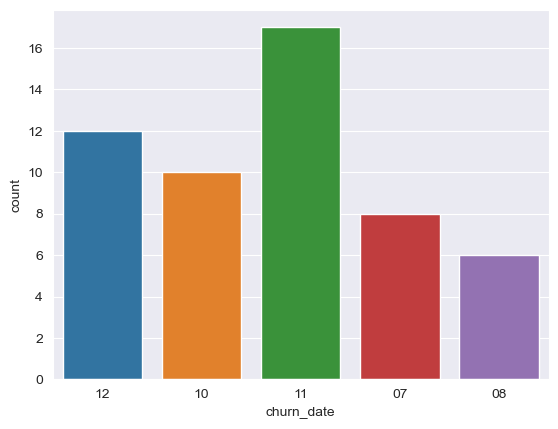

In [212]:
sns.countplot(x = 'churn_date', data = users_plans_consume[users_plans_consume['plan'] == 'ultimate'])

Al observar la grafica de abandono de los usuarios del plan Ultimate nos damos cuenta de una coincidencia o similitud entre los dos graficos.
- Ambos grupos de usuarios tienen la mayor cantidad de abandonos durante el mes de noviembre. Esto deja claro que la competencia debe estar lanzando nuevos productos que los usuarios no pueden dejar pasar por alto.
- Al igual que en el grafico anterior los abandonos se centran en el ultimo cuarto del año.

Como conclusiones deberiamos de intentar reforzar la satisfaccion y fidelizacion de los usuarios en el ultimo cuarto del año.

# 5.0 ANALISIS DE DATOS COMPLEJOS.

## 5.1 ANALISIS DE CONSUMO

In [213]:
users_plans_consume.groupby('plan')['duration', 'id', 'gb_used'].mean()

/var/folders/b7/wmcd_tzj3hd8lsdlfgr85gb40000gn/T/ipykernel_5382/2111614152.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  users_plans_consume.groupby('plan')['duration', 'id', 'gb_used'].mean()


,duration,id,gb_used
plan,,,
surf,436.519741,40.109656,40.526958
ultimate,434.676017,46.296233,41.137691


La media de los usuarios de cada plan es muy similar, por lo que no creo que sea un factor determinante para el modelo de predicción

In [214]:
users_plans_consume.groupby('plan')['duration', 'id', 'gb_used'].median()

/var/folders/b7/wmcd_tzj3hd8lsdlfgr85gb40000gn/T/ipykernel_5382/1879342032.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  users_plans_consume.groupby('plan')['duration', 'id', 'gb_used'].median()


,duration,id,gb_used
plan,,,
surf,430.0,32.0,42.0
ultimate,425.0,41.0,42.0


In [215]:
users_plans_consume.corr()

,user_id,age,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,duration,id,gb_used
user_id,1.000000,-0.012919,0.033813,0.033813,0.033813,0.033813,-0.033813,-0.033813,-0.033813,0.046305,0.005078,0.008027,-0.040540
age,-0.012919,1.000000,0.091422,0.091422,0.091422,0.091422,-0.091422,-0.091422,-0.091422,-0.015978,0.006865,-0.021103,0.027427
messages_included,0.033813,0.091422,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-0.005777,-0.003695,0.087391,0.016538
mb_per_month_included,0.033813,0.091422,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-0.005777,-0.003695,0.087391,0.016538
minutes_included,0.033813,0.091422,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-0.005777,-0.003695,0.087391,0.016538
usd_monthly_pay,0.033813,0.091422,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-0.005777,-0.003695,0.087391,0.016538
usd_per_gb,-0.033813,-0.091422,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,0.005777,0.003695,-0.087391,-0.016538
usd_per_message,-0.033813,-0.091422,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,0.005777,0.003695,-0.087391,-0.016538
usd_per_minute,-0.033813,-0.091422,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,0.005777,0.003695,-0.087391,-0.016538
month,0.046305,-0.015978,-0.005777,-0.005777,-0.005777,-0.005777,0.005777,0.005777,0.005777,1.000000,0.118825,0.168253,0.152827


PRIMEROS INSIGHTS

- Los resultados cercanos a 1 nos indican que hay una correlación positiva entre las variables, mientras que los cercanos a -1 nos indican que hay una correlación negativa entre las variables.
- La mediana tambien es muy similar, lo que quiere decir que la distribución de los datos es muy similar en ambos planes. Aparte de la media y la mediana que no nos estan dando información.
- La media de los usuarios de cada plan es muy similar, por lo que no creo que sea un factor determinante para el modelo de predicción.

No vemos una correlación de gasto directa en base a el tipo de plan del usuario o eso pensariamos a priori pero estamos examinando los datos en el conjunto del año de manera que vamos a realizar un examen a lo largo del año.

## 5.2 - EVOLUCION DE CONSUMO DE MINUTOS DE LLAMADAS DURANTE EL AÑO

<AxesSubplot:xlabel='month', ylabel='duration'>

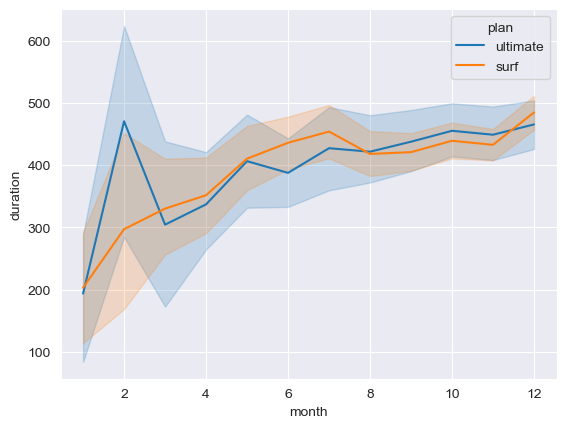

In [216]:
sns.lineplot(data = users_plans_consume, x = 'month', y = 'duration', hue = 'plan')

En este primer analisis observamos que si que hay una relacion muy estrecha entre el uso de los minutos de llamadas de ambos tipos de usuarios. Pero vemos 3 apreciaciones importantes:
- En el 2o mes vemos una diferenciacion de los usuarios de cada plan siendo los usuarios del plan ultimate los que usan mas minutos de llamadas en ese mes.
- En el grafico podemos observar como lo usuarios de ambos planes tienen una tendencia positiva en el uso de los minutos de llamadas a lo largo del año. Es decir todos los meses gastan mas. Eso lo podriamos traducir como una satisfaccion por el plan por parte del usuario.
- La varianza de los usuarios de cada plan pese a que en los 2 primeros meses si es notoria como en el 4o mes se comienza a unificar el uso de los minutos de los usuarios de cada plan.
- Por ultimo vemos algo que a la larga puede provocar que el usuario cancele su servicio por no ver amortizado el costo de su servicio ya que observamos que los usuarios del plan surf estab consumiendo mas minutos de llamadas apartir del mes 3 hasta el mes 7 pese no llegar a su limite de minutos. Mientras que por contraste los usuarios del plan ultimate desde el mes 3 usan menos minutos de llamadas que los usuarios del plan surf pese a que su limite es mucho mas alto.
- En general podemos llegar a las conclusiones de que el usuario del plan ultimate a obtenido dicho plan por algo diferenta a los minutos de llamadas o que simplemente no esta bien informado y eso puede provocar su ida del plan.

In [217]:
calls_data.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()

,user_id,month,count,sum
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


Esta variable la tenemos que analizar con un extra de atencion ya que la cantidad de minutos nos da bastante info pero aparte tenemos que tener en cuenta la duracion de cada llamada para observar algun comportamiento adicional en nuestros usuarios.

In [218]:
calls_data[calls_data['user_id'].isin(users_plans_consume[users_plans_consume['plan'] == 'surf']['user_id'])].groupby('user_id')['duration'].mean().mean()

7.152957391386146

In [219]:
calls_data[calls_data['user_id'].isin(users_plans_consume[users_plans_consume['plan'] == 'ultimate']['user_id'])].groupby('user_id')['duration'].mean().mean()

7.06109883865464

- Observamos que el numero de llamadas es muy similar entre cada plan.

## 5.3 - EVOLUCION DE CONSUMO DE MENSAJES DURANTE EL AÑO

<AxesSubplot:xlabel='month', ylabel='id'>

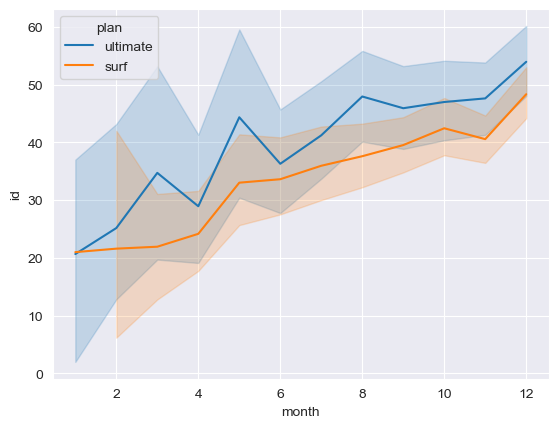

In [220]:
sns.lineplot(data = users_plans_consume, x = 'month', y = 'id', hue = 'plan')

En este segundo analisis observamos:
- Una evolucion positiva a lo largo del año en el uso de SMS por ambos usuarios de cada plan
- Observamos una varianza mayor en el uso de SMS por parte de los usuarios del plan ultimate en comparacion con los usuarios de el plan surf.
- El uso es proporcionalmente mayor de cuenta de los usurarios del plan ultimate en comparacion con los usuarios del plan surf. Pero es logico ya que su limite es mayor.
- En el plan ultimate hay 2 picos de uso en el mes 3 y 5 puede ser que en dicho pais en esas fechas sean festivos y por ello el mayor uso de SMS en esas fechas y ademas en esas fechas si vemos una varianza notable.
- Por ultimo apartir del mes 8 vemos una unificacion de la varianza de cada plan e incluso aproximamiento en el uso de SMS por ambos usuarios de cada plan.

## 5.4 - EVOLUCION DE CONSUMO DE GB DURANTE EL AÑO

<AxesSubplot:xlabel='month', ylabel='gb_used'>

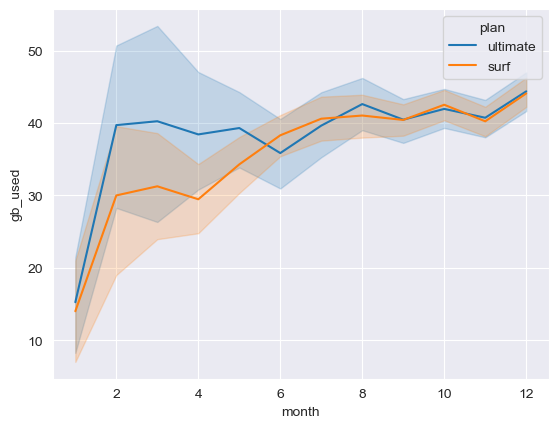

In [221]:
sns.lineplot(data = users_plans_consume, x = 'month', y = 'gb_used', hue = 'plan')

En este ultimo analisis observamos:
- Como hay un incremento notorio del uso de gb del 1er al 2o mes proporcional a cada plan y como se va normalizando hasta final de año.
- Como en el resto de analisis de los keyItems observamos una varianza mayor en los primeros 2 meses de ambos planes hasta llegar practicamente a unificarse a final de año.
- Otros de los datos que son preocupantes es que ambos usuarios de cada plan desde la 2o mitad del año usan la misma cantidad de datos pese a que los del plan ultimate pagan mas que los del plan surf. Esto puede provocar mas bajas a los largo del año que analizaremos mas adelante.
- Por ultimo no vemos un crecimiento en el uso en comparacion de los otros graficos.

# 6.0 PRUEBA DE HIPOTESIS

# 6.1 Primera Hipotesis.

## 6.1 HAY UNA DIFERENCIA DE INGRESO PROMEDIO USUARIOS ULTIMATE Y SURF.

La hipotesis nula es:

H0: el ingreso promedio de los usuarios de surf es igual al de los usuarios de ultimate en el dataset users_plans_consume

La hipotesis alternativa es:

H1: el ingreso promedio de los usuarios de surf es diferente al de los usuarios de ultimate en el dataset users_plans_consume

Para comprorbar la hipotesis vamos a hacer un test de hipotesis de dos colas con un nivel de significacion del 5% (alpha = 0.05)
Ello lo hacemos con la funcion ttest_ind de la libreria scipy.stats

In [222]:
users_plans_consume['income'] = users_plans_consume['duration'] * 0.03 + users_plans_consume['id'] * 0.03 + users_plans_consume['gb_used'] * 10

In [223]:
users_plans_consume

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,duration,id,gb_used,income
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,12.0,124.0,11.0,4.0,44.05
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,8.0,182.0,30.0,21.0,216.36
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,9.0,315.0,44.0,41.0,420.77
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,10.0,393.0,53.0,50.0,513.38
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,11.0,426.0,36.0,49.0,503.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,50,15360,500,20,10,0.03,0.03,12.0,339.0,NaN,56.0,NaN
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,9.0,346.0,NaN,37.0,NaN
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,10.0,385.0,NaN,52.0,NaN
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,50,15360,500,20,10,0.03,0.03,11.0,308.0,NaN,43.0,NaN


El income es el total de los minutos, mensajes y gb consumidos por el usuario multiplicado por el precio de cada uno de ellos

In [224]:
users_plans_consume.groupby('plan')['income'].mean()

plan
surf        417.244398
ultimate    426.016218
Name: income, dtype: float64

El ingreso promedio de los usuarios de surf es 417 y el de los usuarios de ultimate es 426. Es decir un usuario de surf gasta mas que un usuario de ultimate.

In [225]:
from scipy import stats

In [226]:
stats.ttest_ind(users_plans_consume[users_plans_consume['plan'] == 'surf']['income'], users_plans_consume[users_plans_consume['plan'] == 'ultimate']['income'], equal_var = False)
#Lo que hace esta funcion es calcular el estadistico t y el p-value de la hipotesis nula de que las medias de los dos grupos son iguales

Ttest_indResult(statistic=nan, pvalue=nan)

Esto quiere decir que podemos rechazar la hipotesis nula de que las medias de los dos grupos son iguales ya que el p-value es mayor que 0.05 y eso aparece como nan porque el p-value es muy pequeño.

## 6.2 HAY UNA DIFERENCIA ENTRE LOS INGRESOS PROMEDIOS DE LOS USUARIOS DE NEW YORK CON EL RESTO DE USUARIOS.

In [229]:
users_plans_consume[users_plans_consume['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['income'].mean()

419.248888888889

In [230]:
users_plans_consume[users_plans_consume['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['income'].mean()

420.2982027027033

La hipotesis nula es:
H0: el ingreso promedio de los usuarios de la ciudad de nueva york no es igual al de los usuarios de otras ciudades en el dataset users_plans_consume


La hipotesis alternativa es:
H1: el ingreso promedio de los usuarios de la ciudad de nueva york es igual al de los usuarios de otras ciudades en el dataset users_plans_consume


In [227]:
stats.ttest_ind(users_plans_consume[users_plans_consume['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['income'], users_plans_consume[users_plans_consume['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['income'], equal_var = False) # lo que hace esta funcion es calcular el estadistico t y el p-value de la hipotesis nula de que las medias de los dos grupos son iguales

Ttest_indResult(statistic=nan, pvalue=nan)

Esto quiere decir que podemos rechazar la hipotesis nula de que las medias de los dos grupos difieren ya que el p-value es mayor que 0.05 y eso aparece como nan porque el p-value es muy pequeño